# IMPORT

In [20]:
import pandas as pd
from zipfile import ZipFile
from os import listdir
from os.path import isfile, join
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import operator

## Récupération sur tous
On met dans dico chaque theme associé à la liste des dates des questions 

In [80]:
dico = dict()
for f in listdir('json'):
    try:
        df = pd.read_json('json/'+f)
        theme = df['question']['indexationAN']['rubrique']
        date = df['question']['textesQuestion']['texteQuestion']['infoJO']['dateJO']
        dateu = dt.datetime.strptime(date, '%d/%m/%Y')
        if theme in dico:
            dico[theme].append(dateu)
        else:
            dico[theme] = [dateu]
    except:
        print('Je suis un cacaca',f)
print('terminatado')

Je suis un cacaca .ipynb_checkpoints
terminatado


## Transformation en vecteurs
On forme un autre dictionnaire dicoplot associant chaque thème à un vecteur représentant l'occurence des questions par mois

In [88]:
dicoplot = dict()
for theme in dico:
    vecteur = [0 for i in range(36)]
    for date in dico[theme]:
        vecteur[(date.year-2017)*12+date.month] += 1 
    dicoplot[theme] = vecteur

## Tri des premiers
On récupềre dans prems les noms des 5 thèmes les plus recherchés

In [148]:
diconb = dict()
for theme in dico:
    diconb[theme] = len(dico[theme])
tries = sorted(diconb.items(),reverse = True,key=operator.itemgetter(1))
prems = [th for th,i in tries[:5]]

## Vers DATAFRAME
Formation du DataFrame équivalent à dico

In [163]:
delay=pd.date_range(start=pd.to_datetime('01/01/2017'),periods=36,freq='M')
df2 = pd.DataFrame(dicoplot,index=delay)

# Affichages

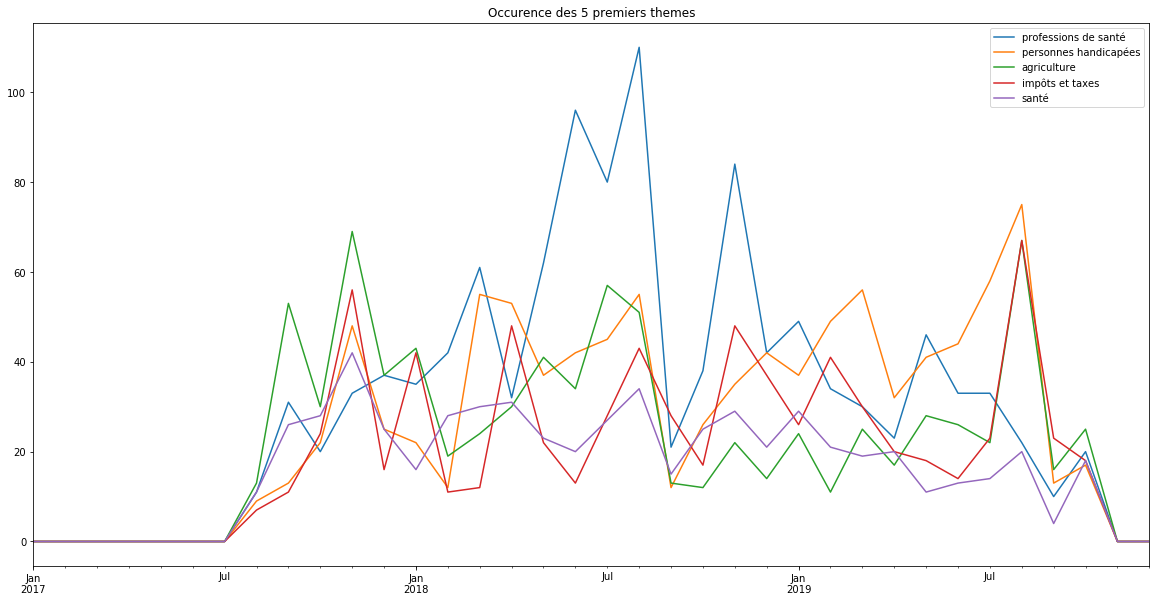

In [172]:
df2.plot(figsize = (20,10),title = 'Occurence des 5 premiers themes',y = prems)
plt.savefig("occurence5Premiers.png")

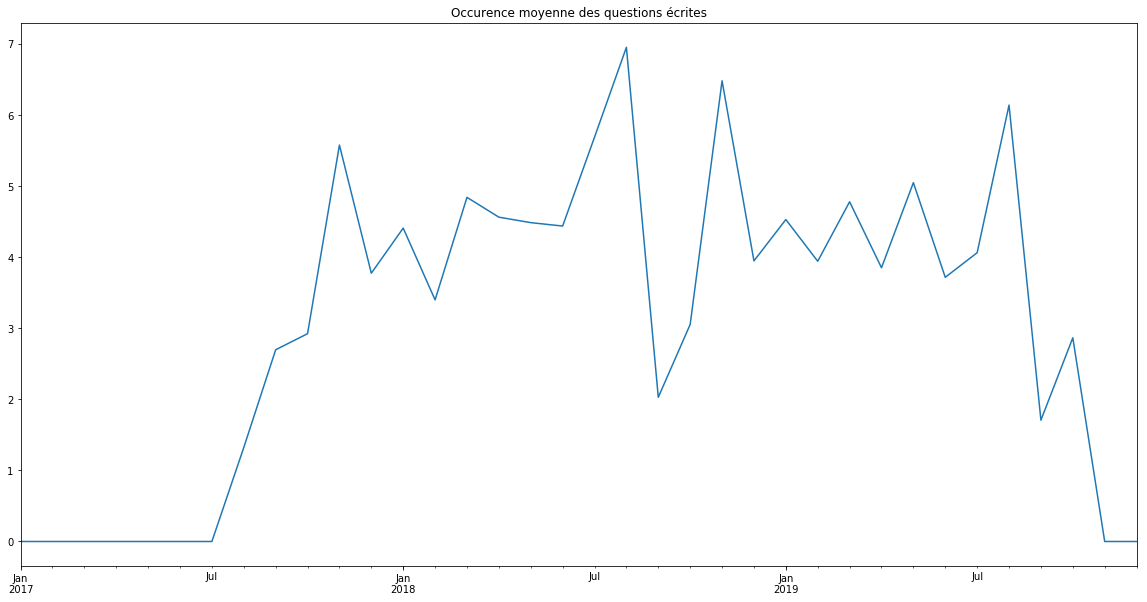

In [171]:
df2.mean(axis = 1).plot(figsize = (20,10),title = 'Occurence moyenne des questions écrites',y = 'Moyenne des occurences ')
plt.savefig("occurenceMoyenne.png")

## Enregistrement

In [158]:
pd.DataFrame.to_feather(df2, 'occurences_mois_2017-2019.bin')

ImportError: pyarrow is not installed

you can install via conda
conda install pyarrow -c conda-forge
or via pip
pip install -U pyarrow


In [159]:
conda install pyarrow -c conda-forge

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::blas==2.8=openblas
  - conda-forge/linux-64::liblapacke==3.8.0=8_openblas
  - conda-forge/linux-64::numba==0.42.1=py37hf484d3e_0
  - conda-forge/linux-64::matplotlib==3.0.3=py37_1
done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pyarrow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arrow-cpp-0.13.0           |   py37h246e31e_6         3.5 MB  conda-forge
    boost-cpp-1.70.0           |       ha2d47e9_1        21.1 MB  conda-forge
    brotli-1.0.7               |    he1b5a44_1000         1.0 MB  co